# Q5- Linear Fit

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('covid_19_india.csv')
df = df.drop(['Time', 'State/UnionTerritory','ConfirmedIndianNational','ConfirmedForeignNational','Cured','Confirmed'], axis=1)
print(df)

         Sno        Date  Deaths
0          1  2020-01-30       0
1          2  2020-01-31       0
2          3  2020-02-01       0
3          4  2020-02-02       0
4          5  2020-02-03       0
...      ...         ...     ...
18105  18106  2021-08-11    3831
18106  18107  2021-08-11     773
18107  18108  2021-08-11    7368
18108  18109  2021-08-11   22775
18109  18110  2021-08-11   18252

[18110 rows x 3 columns]


### To get the data for May 2021, i slice only the part of May and since the data is divided into States and UT, i add the data for 36 states and UT. Also since it contains cumulative deaths, so to get deaths on each day, i subtracted the cumulative deaths of previous day. Then the usual linear fit method is used.

Mean Square error in prediction for May 23 to May 31: 716297.2571360697
Day in May, Actual Deaths, Predicted Deaths
(23, 3741, 4332)
(24, 4454, 4364)
(25, 3511, 4396)
(26, 4157, 4429)
(27, 3847, 4461)
(28, 3660, 4493)
(29, 3617, 4525)
(30, 3460, 4557)
(31, 3128, 4589)
Predicted Deaths on April 20, 2021: 3274 , Error %: 58.16425120772947 %
Predicted Deaths on June 10, 2021: 4910 , Error %: 137.5423318819545 %


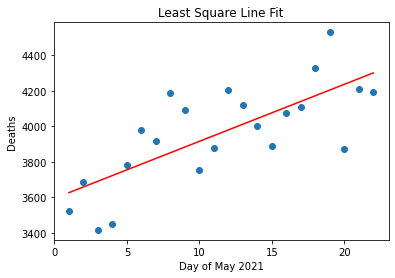

In [3]:
df=df.iloc[14366:15518]
listy1=[0]*32
for i in range(1,33):
    s=0
    for j in range(14366+(i-1)*36,14366+i*36):
        s=s+df.at[j,'Deaths']
    listy1[i-1]=s
listx = list(range(1,33))
listy=[]
for i in range(1,32):
    listy.append(listy1[i]-listy1[i-1])
tlisty=listy
tlistx=listx
listx=listx[0:22]
listy=listy[0:22]
m=len(listx)
dates=np.array(listx)
deaths=np.array(listy)
meanx=np.mean(dates)
meany=np.mean(deaths)
meanxlist=np.ones([m], dtype=np.uint) *meanx
meanylist=np.ones([m], dtype=np.uint) *meany
devx=np.subtract(dates,meanxlist)
devy=np.subtract(deaths,meanylist)
devprod=np.multiply(devx,devy)
devx2=np.square(devx)
slope=sum(devprod)/sum(devx2)
intercept=meany-slope*meanx
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(dates,deaths)
x = np.linspace(1,22,100)
y = intercept+x*slope
ax1.plot(x, y, '-r')
plt.title('Least Square Line Fit')
plt.xlabel('Day of May 2021')
plt.ylabel('Deaths')
predeaths=[0]*31
errorsum=0
for i in range(22,31):
    errorsum+=pow(intercept+tlistx[i]*slope-tlisty[i],2)
    predeaths[i]=int(round(intercept+tlistx[i]*slope))
print("Mean Square error in prediction for May 23 to May 31:",errorsum/(9))
print('Day in May, Actual Deaths, Predicted Deaths')
for row in zip(tlistx[22:31],tlisty[22:31], predeaths[22:31]):
    print (''.join(str(row)))
print("Predicted Deaths on April 20, 2021:",int(round(intercept+(-10)*slope)),", Error %:",(int(round(intercept+(-10)*slope))-2070)*100/2070,'%')
print("Predicted Deaths on June 10, 2021:",int(round(intercept+(41)*slope)),", Error %:",(int(round(intercept+(41)*slope))-2067)*100/2067,'%')

# Q5- Quadratic Fit 
## Y=w2\*X^2 + w1\*X +w0 where Y is deaths per day and X is day of May 2021.
### (Using Normal Equations )

The curve is: Y= 3425.1428571428705 + 74.42151326934089 *X + -1.8410502540937905 *X^2
Mean Square error in prediction for May 23 to May 31: 227826.77777777778
Day in May, Actual Deaths, Predicted Deaths
(23, 3741, 4163)
(24, 4454, 4151)
(25, 3511, 4135)
(26, 4157, 4116)
(27, 3847, 4092)
(28, 3660, 4066)
(29, 3617, 4035)
(30, 3460, 4001)
(31, 3128, 3963)
Predicted Deaths on April 20, 2021: 2497 , Error %: 20.6280193236715 %
Predicted Deaths on June 10, 2021: 3382 , Error %: 63.61877116594098 %


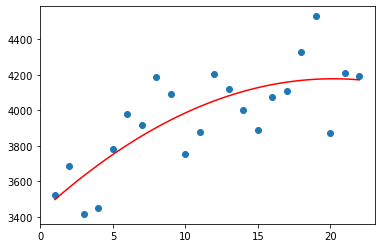

In [51]:
y1 = listy
x1 = listx
xo=[1]*len(x1)
x2=[i*i for i in x1]
x=list(zip(xo,x1,x2))
y=np.matrix(y1)
x=np.matrix(x)
y=y.transpose()
w=np.linalg.inv(x.transpose()*x)*x.transpose()*y
w0=w[0][0].item()
w1=w[1][0].item()
w2=w[2][0].item()
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x1,y1)
i=np.linspace(1,22,100)
j=w2*i*i+w1*i+w0
ax1.plot(i,j,'-r')
predeaths=[int(round(w2*i*i+w1*i+w0)) for i in tlistx]
print("The curve is: Y=",w0,"+",w1,"*X +",w2,"*X^2")
errorsum=0
for i in range(22,31):
    errorsum+=pow(predeaths[i]-tlisty[i],2)
print("Mean Square error in prediction for May 23 to May 31:",errorsum/(9))
print('Day in May, Actual Deaths, Predicted Deaths')
for row in zip(tlistx[22:31],tlisty[22:31], predeaths[22:31]):
    print (''.join(str(row)))
print("Predicted Deaths on April 20, 2021:",int(round(w2*100-w1*10+w0)),", Error %:",(int(round(w2*100-w1*10+w0))-2070)*100/2070,'%')
print("Predicted Deaths on June 10, 2021:",int(round(w2*1681+w1*41+w0)),", Error %:",(int(round(w2*1681+w1*41+w0))-2067)*100/2067,'%')

# Comparison
### So we observe that the error % of quadratic fit is much better at 20% against 58% of linear fit for April 20 and at 63% against 137% of linear fit for June 10. The Mean square error for last 9 days of May 2021 is 227826 for quadratic fit as opposed to 716297 for linear fit.